# Scrapping and creating a dataset of skateboards

scraped on https://www.deckslog.com/skateboard/

In [70]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import requests 
import shutil 
import os

In [6]:
import sys
sys.setrecursionlimit(100000)

In [15]:
page = 1
url = f'https://www.deckslog.com/skateboard/page/{page}/'

In [16]:
# This is where we do an HTTP request to get the HTML from the website
response = requests.get(url)

# And this is where we feed that HTML to the parser
soup = BeautifulSoup(response.content, "html.parser")

In [17]:
boards_html = soup.find_all("div", class_="card")

## Parsing _one_ board

In [18]:
boards_html[0]

<div class="card"><div class="card-media"> <a href="https://www.deckslog.com/skateboard/skate-mental-alien-vs-predator-night-8-4/"> <img alt="Skate Mental'" class="card-img-top" src="https://www.deckslog.com/wp-content/uploads/2022/12/SkateMentalAlienVsPredatorNightDeckcopy.jpg"/> </a></div><div class="card-body"><h3 class="card-title"> Skate Mental / AlienVs Predator Night</h3><div class="card-text meta-info"><div class="lineitem lineitem_company"><div class="label">Company:</div><div class="content"><span>Skate Mental</span></div></div><div class="lineitem lineitem_artist"><div class="label">Artist:</div><div class="content"><span></span></div></div><div class="lineitem lineitem_year"><div class="label">Released:</div><div class="content"><span></span></div></div></div></div></div>

In [42]:
board_title=boards_html[0].find('h3', class_="card-title").string
board_company=boards_html[0].find('div', class_="lineitem lineitem_company").find('div', class_='content').find('span').string
board_image_hyperlink=boards_html[0].find('div', class_="card-media").find('img').attrs['src']
board_artist=boards_html[0].find('div', class_="lineitem lineitem_artist").find('div', class_='content').find('span').string
board_year=boards_html[0].find('div', class_="lineitem lineitem_year").find('div', class_='content').find('span').string
board_title,board_company,board_year,board_artist,board_image_hyperlink

(' Skate Mental / AlienVs Predator Night',
 'Skate Mental',
 None,
 None,
 'https://www.deckslog.com/wp-content/uploads/2022/12/SkateMentalAlienVsPredatorNightDeckcopy.jpg')

In [57]:
url = board_image_hyperlink
file_name = f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"

res = requests.get(url, stream = True)

if res.status_code == 200:
    with open(file_name,'wb') as f:
        shutil.copyfileobj(res.raw, f)
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorNightDeckcopy.jpg


In [54]:
board_image_path=f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"
board_image_path

'/Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorNightDeckcopy.jpg'

## Parsing _all_ boards

In [55]:
boards_dict = { 'Title': [], 'Company': [], 'Image_hyperlink': [], 'Artist': [], 'Year': [], 'Image_path': []}

In [56]:
def download_image(board_image_hyperlink):
    url = board_image_hyperlink
    file_name = f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"

    res = requests.get(url, stream = True)

    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
        print('Image sucessfully Downloaded: ',file_name)
        return 0
    else:
        print('Image Couldn\'t be retrieved')
        return 404

In [60]:
for i in range(1,196):
    
    page = i
    url = f'https://www.deckslog.com/skateboard/page/{page}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    boards_html = soup.find_all("div", class_="card")
    print(f'{i}/195')

    for board in boards_html:
        board_title=board.find('h3', class_="card-title").string
        board_company=board.find('div', class_="lineitem lineitem_company").find('div', class_='content').find('span').string
        board_artist=board.find('div', class_="lineitem lineitem_artist").find('div', class_='content').find('span').string
        board_year=board.find('div', class_="lineitem lineitem_year").find('div', class_='content').find('span').string
        
        if board.find('div', class_="card-media") is not None:
            board_image_hyperlink=board.find('div', class_="card-media").find('img').attrs['src']
            board_image_path=f"{os.path.abspath('raw_data')}/{board_image_hyperlink.split('/')[-1]}"
            download_image(board_image_hyperlink)
        
        else:
            board_image_hyperlink= None
            board_image_path= None
        
        boards_dict['Title'].append(board_title)
        boards_dict['Company'].append(board_company)
        boards_dict['Image_hyperlink'].append(board_image_hyperlink)
        boards_dict['Image_path'].append(board_image_path)
        boards_dict['Artist'].append(board_artist)
        boards_dict['Year'].append(board_year)
        

boards_dict

1/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorNightDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateMentalAlienVsPredatorDayDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AW0101400A8000.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/anti-hero-classic-eagle-orange-deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/anti-hero-classic-eagle-larger-deck-8-25.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/anteagle.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/anti-hero-classic-eagle-deck-black.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/i1kAAOSw~AFjOf-e

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/powell-peralta-steve-steadham-craig-stecyk-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/powell-peralta-rodney-mullen-v-courtlandt-johnson-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/suicidal-skates-possessed-to-skate-rick-clayton-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/skull-skates-christian-hosoi-ivan-hosoi-pd-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/uncle-wiggley-fishtik-doug-ring-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/uncle-wiggley-argyle-doug-ring-1985.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/santa-cruz-micke-alba-mofo-1985.jpg
Image sucessfully D

11/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/world-industries-mike-vallely-marc-mckee-1989v2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/world-industries-steve-rocco-marc-mckee-1989.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/world-industries-mike-vallely-marc-mckee-1989.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/powell-peralta-mike-mcgill-skull-and-snake-1989.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/real-jim-thiebaud-natas-kaupas-kevin-ancell-1990.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/powell-peralta-ray-barbee-sean-cliver-1990.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/powell-peralta-steve-caballero-sean-cliver-199

16/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-mark-baines-great-britain-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-flynn-trotman-chapter-two-1984-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-flynn-trotman-chronicles-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-team-masterplan-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-rob-selley-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-kyle-flynn-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/blueprint-colin-kennedy-mackintosh-1998.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_de

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoLogoGloss_MatteRedDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoLogoGloss_MatteOliveDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoLogoGloss_MatteWhiteDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoDaisyBlueDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoDanijel_Jugga_StankovichMaxiMouseDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoDaisyYellowDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalSkateboardCoxGreyAreaGhostGameDeck.jpg
Ima

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyWarOnIceBlackDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyWarOnIceRedDeckcopy_3240a1bf-fedb-481a-ba0f-82f75f54da67.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyWarOnIceRedDeckcopy_f3362259-4080-42ad-b002-3e1387bdea52.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyWarOnIceRedDeckcopy_c5a3b3dc-0a64-4080-837f-a6b362c4451c.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyWarOnIceRedDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersEtienneGagneBaltiDeck8.25.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillMarshallBaltiDeck.jpg
Image sucessfully Downl

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineMaxPalmerOpiumDenDeck_6bc83925-f198-4826-9c3b-d3af48ce0c78.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineMaxPalmerOpiumDenDeck_0e9109f5-70bb-4d61-b1fa-5bd26f89fe22.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineMaxPalmerOpiumDenDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineCyrusBennettPaymasterDeck_152ce774-05b4-4dfb-a939-ea4e1f84b6d0.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineHugoBoserupHugorbDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineCyrusBennettPaymasterDeck_b48bf5f8-d27e-4926-8cb3-17a67ea6b253.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_d

36/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeAidanMackeyStreetDeck_577bf55e-8e8b-4d96-8992-c575e858cf10.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeAidanMackeyStreetDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/RealNicoleHauseProOvalDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceRoryMilanesProS31Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceBennyFairfaxProS31Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceLucasPuigProS31Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceLucienClarkeProS31Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_deck

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroDyingToLiveSkullDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroGabrielSummersGoldenTigerDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroxMisfitsEvilEyeMatteGreenDippedDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroxMisfitsDieDieMyDarlingMattePinkDippedDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroxMisfitsFiendSkullMatteYellowDippedDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ZeroxMisfitsFiendSkullMatteYellowDippedDeckcopy_d16ddb28-5142-4cdc-b91e-6bc1d12e3ec4.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Quasi1989Deck9.jpg
Image sucessfully Download

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ChocolateJamesCappsSasquatchDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ChocolateVincentAlvarezBanditoDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/GirlNielsBennettNineInchNielsLoveSeatDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ChocolateCarlisleAikensCarl_sMomDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/GirlRickMcCrankColonialismDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/GirlBreanaGeeringColonialismDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/GirlBreanaGeeringFlowersDeck_30531aea-c891-4b8f-bfe0-da009e1a59ce.jpg
Image sucessfully Downloaded:  /Users/etiennelanzer

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceJamalSmithProS30Deck8.25.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceChewyCannonProS30Deck8.375.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceKyleWilsonProS30Deck8.375.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceHeitorDaSilvaProS30Deck8.375.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceCharlieBirchProS30Deck8.5.jpg
52/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceSessionDeck8.6.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceSessionDeck8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceTrippyDeck7.75.jpg
I

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarDaneBradyFailureDeck_d1654831-5fd9-4313-8623-774cd858d7d2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarDaneBradyFailureDeckDane1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarAaronHerringtonTwisted1991Jr.Deckbottom.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarAaronHerringtonTwistedDeckbottom.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarAaronHerringtonTwistedDeckbottom_d75fcca4-05a6-4c5b-8260-0aa7c3020402.jpg
57/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDChristianMaaloufNaturalGasDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDTrevorThompsonWiredDeckcopy.jp

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogJesseAlbaHamburgerTruckDeck_d0f749b0-4c49-489a-a558-6468aadab7e6.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogPatGallaherLonesomeFishesDeck_21cca085-7358-4c6b-b3db-189e111c198e.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogJesseAlbaHamburgerTruckDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogPatGallaherLonesomeFishesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogSensational_Deckbeige_cf3a6905-c27a-4f9b-a04f-d7d133b160f3.jpg
62/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogSensational_Deckbeige_cf3a6905-c27a-4f9b-a04f-d7d133b160f3.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/ra

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/StrangeLoveChrisReed_WhereMyDogsAtDeckcopy.jpg
67/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ClownxParisSaintGermainNYCDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ClownxParisSaintGermainParisDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ClownxParisSaintGermainLADeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/YardsaleHorizonGreenDeckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/YardsaleBaphomet2Deckcopy.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ChocolateJordanTrahanFrenchQuarterDeck_267285d9-f1c8-4108-902c-8fd55771af97.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray

72/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeLandscapesDeckFuckingAwesomeLandscapesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeMary-AnnDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeMaryDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeMaryDeck_162ee86c-0f88-412b-937f-ed845f7139ff.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeRecoveryDeck_3e3df59d-2ec0-44cb-9cb8-219171666c05.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeRecoveryDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeRecoveryDeck_0b24ae24-4de6-4d28-94a2-ecea49fdbfc9.jpg

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/heroinquestionsjoan.jpg
77/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/deathlurkII.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/heroincurbcrusherxlgold.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/deaddavetvparty.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Rassvet_PACCBET_EyesDeck8.5beige.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DeathDaveAllenDoveDeck_818a312d-da93-4e6e-978f-b79bba3c1be4.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SantaCruzDressenRoseCrewProDeck9.31.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SantaCruzReissueKendallEndOf

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Gator8.25.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/tiredthegatordeckstumpnose.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateboardCafeChocolatesdeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateboardCafeChocolatesdeck_a6a83a5c-bd77-460a-8376-f3ce92bb5079.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateboardCafeTrumpetLogoDeckPeach_WhiteFade_f3ca88a5-70cc-42f8-b277-c92f2bb09981.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateboardCafeTrumpetLogoDeckPeach_WhiteFade_291ef40a-80c3-442a-adf4-fb4d7d5f6a1b.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SkateboardCafeTrumpetLogoDeckPeach_W

87/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDParrotHeadProTbdDeck8.5.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceSavesDeck8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDTrevorThompsonOkeechobeeDeck8.25_CT.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceSavesDeck8.1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceCharlieBirchProS29Deck8.5.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceChickenS29Deck7.75.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceKyleWilsonProS29Deck8.25.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceJamalSmithProS29Deck8.25.jpg
Im

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheHeatedWheelSportsmanDeck9.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillMarshallRollin_Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersDustinHenryMorningFuelDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillMarshallSpaceTrashDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersAlexisSabloneWhipNameProperDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersDustinHenrySpaceTrashDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersAlexisSabloneSpaceTrashDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_projec

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeKevinBradleyLogoClassPhotoDeckgreen.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeJasonDillLogoClassPhotoDeckpink_936a73b0-42b3-43f9-86cf-da168044ebe1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeGinoIannucciLogoClassPhotoDeckgreen_813debfc-9466-428a-b941-f49e936856c7.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeJasonDillLogoClassPhotoDeckgreen.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeElijahBerleLogoClassPhotoDeckred_77925f33-6544-47a4-8c6a-f4866bc1e54e.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeAnthonyVanEngelenLogoClassPhotoDeckpink_fb1b55cb-3f04-4b3b-9ab1

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsEvanSmithRemnantsDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsRomanPabichUndercurrentonWiddlerDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsMaiteSteenhoudtUndercurrentDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsMaiteSteenhoudtUndercurrentDeck8.7.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsEvanSmithUndercurrentDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsMaiteSteenhoudtShadowDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaLandsledsMaiteSteenhoudtPinkLadyDeck.jpg
103/195
Image sucessfully Downloaded: 

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiDaewonSongRound3R7Deck_7aa0947f-4a78-4099-aff8-78c2f5d136bb.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiChrisHallamRound3R7Deck_98367e27-781d-4bfe-bc1b-db44c57465d9.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiChrisHallamRound3R7Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiThaynanCostaClassicPandaSuperSapR7Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiSamarriaBrevardClassicPandaSuperSapR7Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EnjoiDeedzClassicPandaSuperSapR7Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlmostLewisMarnellForeverDudeR7Deck.jpg
108/

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyDonovonPiscopoPhantomDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyNikStainWhisperSnowDeck_816aed69-c1b5-483b-8ec5-ad5bd3161f93.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyNikStainWhisperBlueDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyAndrewAllenHPSyntheticDeck_2be82112-87c5-4d01-91e8-2b253c9c0608.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyAndrewAllenHPSyntheticDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyKevinRodriguesAthenaDeck_2549a9d5-f181-4e1c-af1a-2a071c5fcef2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyKevinRodriguesAthenaDeck.j

117/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaSoyPandayExtravisionSeriesDeck_08fd0453-0d70-497e-bcc9-f3e00664fc6d.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaJameelDouglasExtravisionSeriesDeck_b98e2d89-37a2-4221-960b-8fe9818a860d.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaSoyPandayExtravisionSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaJameelDouglasExtravisionSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaVivienFeilExtravisionSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MagentaVivienFeilExtravisionSeriesDeck_82a7cf96-8bcb-40e6-b769-f0a7c50b5d93.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk

122/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatMarkSuciuTopographicSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HoppsBigHoppsBlazeDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatSilasBaxter-NealTopographicSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatKaueCossaTopographicSeriesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatxTwinPeaksDioramaLodgeDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatxTwinPeaksDioramaLaura_sHouseDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HabitatxTwinPeaksDioramaSheriffDept.Deck_.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineMaxPalmerLordOfRatsDeck_69552be4-c2e7-45a9-bfa7-8b19cf3d12f3.jpg
127/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineSnakePitDeck_6ab31c73-ed2b-4a8e-bea0-8502befa275f.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineMaxPalmerLordOfRatsDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogChrisMilicSecretRoomDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/LimosineSnakePitDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FrogLightningStrikesTheBrain_Sometimes...Deck_.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarHjalteHalbergKeyholeDeck.jpg
Image sucessfully Downloaded:  /Us

132/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilGuyMarianoCornettoDeck_8b00a562-b8a7-4141-9fde-bf4a2f70e5f6.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilGuyMarianoCornettoDeck_0ebdba94-e3e6-460b-b14f-ae3547c3a64f.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilGuyMarianoCornettoDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Pass_PortJackO_GradyCocktailProSeriesBloodyMaryDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Pass_PortSwatterSeriesGangDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Pass_PortThreadsSeriesFalconDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Pass_PortCandleSeriesBootDeck8.125.jpg
Image suces

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeTyshawnJonesSnickersDeckblue_a39bae1b-bcee-4420-bd57-5a7d3ca1a499.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeAmericaInMotionDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeTyshawnJonesSnickersDeckred.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeComicBlackDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeComicLightBlueDeck_dc29f953-1ec8-45a5-ae03-2fde97fb1aa9.jpg
137/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeComicNeonGreenDeck_b9ae4132-8359-4528-9f91-5ad015be8bad.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersZeredBassettSpeciesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillMarshallSpeciesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersDustinHenrySpeciesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersAlexisSabloneSpeciesDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersZeredBassettNVADeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersAlexisSabloneNVADeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillMarshallNVADeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TheNationalDefoM

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlack_RedDeck_f12ab46b-3abc-4fb4-9e48-1602ac1fe25d.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlack_RedDeck_924adb00-e4af-47bf-a50c-76956c6d618f.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlack_RedDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlack_RedDeck_5f5cd175-80e7-4579-97c4-c845208796e4.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlackBlueDeck_30a2551b-4224-4bbe-920d-48b255974942.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AprilALogoBlackBlueDeck_77a9159b-4410-42ca-b2dc-9bbf3af791f2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Apr

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EVISEN-_0000_AdultsOnlyWhite_1024x1024_b2fb2a0e-28ff-4057-8fd9-8d6c4050b58c.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EVISEN-_0000_DripLogo2_1024x1024_fad88072-553b-4a5e-bd33-2308ab86e16e.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EVISEN-_0000_DripLogo2_1024x1024_4051664d-34e5-4d2d-9980-5d4359f3a67c.jpg
151/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EVISEN-_0000_DripLogo2_1024x1024_845f8334-acff-4d0e-ba80-39f26d814ab2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/EVISEN_0000_BentArgyle_1024x1024_99f5a861-b701-4efd-8eea-94331da5f065.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/SOUR-_0000_SOUR-FA21-027-SOUR-ARMY-SPOOKED_900x_058e66f6-fa75-47

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/StudioTennisDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/StudioVanityDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/StudioRaceCarsDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/KrookedRayBarbeeParasolDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/gx1000-dmt-deck-8-125.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/gx1000-sees-all-deck-8-375.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/antihero-shaped-eagle-beach-bum-deck-9-55.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PalaceBulldogDeck7.75.jpg
Image sucessfully Downloaded:  /Users/

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/jiren.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/neal.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/ULTRAINSTINCT.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/BUCCHIERI_1A1_CELESTE.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/MARTINEZ_RABIOSO.jpg
161/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/BUCCHIERI_PILETA_565f0183-5fe1-4b91-9c45-6795676d6428.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/CleaverAnatomy_955f3cdf-8186-41b9-9554-d5a0fe5c94d1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/CleaverBoletos_2128b5f1-82f0-4c17-8c6f-0701b75f5269.jpg
Im

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/girl-breana-geering-93-til-w41-deck-81.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HABITAT-_0001_geodesic.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HABITAT-_0000_tricolour.jpg
166/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyJohnFitzgeraldStoneBlackDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyJohnFitzgeraldStoneBlackDeck_992af899-bf6c-4353-bb38-25c75ccb8505.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyJohnFitzgeraldStoneFoilDeck_26c4b964-3655-463a-bcd9-4845b8993a95.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/HockeyJohnFitzgeraldStoneFoilDeck.jpg
Image sucessfully Down

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/thank-_0000_8ynqDso9ao46rtx8EEUl7Cjwu9D7byIdTe5pRg8h-1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/thank-_0000_idybYQYECicoFKTbdG5s2vbwDsaS5N0lnPvsVIVN.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/thank-_0000_vYXKyc3LeNa1Roht43AXLjAu5px09PdJRntNwBQJ.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/thankyou-_0000_5chfS4Sf9ovHd3vRN5TGLOwxMfS4YtftyvqPiUk4.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKND-_0006_support-1.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKND-_0007_skull.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDTomKarangelovSkunkDeck_f30a39c5-9007-4aa7-825a-8740fa90219c.jpg
Image suc

175/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PP-_0002_HALLMARK_SERIES_DECANTER_1024x1024_879bd0fe-8d1d-4d7e-bd2a-b133e10e424b.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PP-_0002_PET_PLATE_PRO_SERIES_DEAN_OSCAR_1024x1024_4a1cbee1-7c8a-4564-add8-2c9ab6db7f7f.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PP-_0001_HALLMARK_SERIES_CHALICE_1024x1024_dd00b31e-3f7b-41b0-915c-0cf0377fabb2.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PP-_0002_GATED_SERIES_GRAPES_1024x1024_add02f89-52b1-4d9e-8877-bc581198eff8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TIRED-_0014_SWIRL-DEAL.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/TIRED-_0008_SUPER-SIGAR.jpg
Image sucessfully Downloaded:  /Users/etienn

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaBlocks_0855aaaf-afc2-4125-904b-f08a90ab1a51.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/cleaver-klee-vr-neg-deck-8-375.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaBlocks.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UMAColmanMaite.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UMABovoWiddler.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/UmaColmanmaite8.625.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersZeredAirman.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/AlltimersWillHeadCracker8.1.jpg
Image sucessfully Downloaded:  /Users/etienne

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/StudioTalkDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDOverseerDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDGoldLogoDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDJordanTaylorStreetSharkDeck_fce95dce-8b53-4124-9445-781e5ffba840.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDGoldPlatedLogoDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDJordanTaylorStreetSharkDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/WKNDTrevorThompsonSchemingDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/PolarHjalteHalbergIsolationDeck.

Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Deathwish-Original-G-Tropical-deck-8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Deathwish-Deathspray-Multi-deck-8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/Deathwish-Fee-Fi-Fo-Foy-deck-8.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DeathScriptWhite_RedDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DarkroomMiamiHopperDeck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DarkroomGrendel_TalismanSubSeries_Deck.jpg
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DarkroomComoLaCigarraDeck.jpg
191/195
Image sucessfully Downloaded:  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/DarkroomCarn

{'Title': [' Skate Mental / AlienVs Predator Night',
  ' Skate / Mental Vs Predator Day 8.28',
  ' Alien Workshop / Debut Decks Blue',
  ' Antihero / Classic Eagle Orange',
  ' Antihero / Classic Eagle Larger',
  ' Antihero / Classic Eagle Blue',
  ' Antihero / Classic Eagle Black',
  ' World Industries / Flameboy vs Wet Willy',
  ' StrangeLove / Side effect / remote killer',
  ' StrangeLove / Punk Ghoul Purple Stain',
  ' Anti Hero / Hooters Tramp Stamp',
  ' / Hatsune- Miku',
  ' Madrid / Jester',
  ' Vision / Frankenstein',
  ' Toy Machine / Cut Ups',
  ' Toy Machine / Monster',
  ' Toy Machine / Fists',
  ' Toy Machine / Robot',
  ' Flip / Team Deck',
  ' Flip / Geoff Rowley',
  ' Eurocana / Per Welinder',
  ' Powell Peralta / Ray "Bones"Rodriguez',
  ' Powell Peralta / Ray "Bones" Rodriguez',
  ' Powell Peralta / Steve Caballero',
  ' Variflex / Lance Mountain',
  ' Powell Peralta / Alan Gelfand',
  ' Powell Peralta / Jay Smith',
  ' Powell Peralta / Rodney Mullen',
  ' Powell Per

## Loading data in Pandas

In [61]:
boards_df = pd.DataFrame.from_dict(boards_dict)
boards_df

Title         Company  \
0      Skate Mental / AlienVs Predator Night    Skate Mental   
1        Skate / Mental Vs Predator Day 8.28           Skate   
2          Alien Workshop / Debut Decks Blue  Alien Workshop   
3            Antihero / Classic Eagle Orange        Antihero   
4            Antihero / Classic Eagle Larger        Antihero   
...                                      ...             ...   
2697                  Death / Og Skull White           Death   
2698                  Death / Og Skull Black           Death   
2699     Antihero / Shaped Eagle Green Giant        Antihero   
2700     Antihero / Shaped Eagle Blue Meanie        Antihero   
2701          Antihero / Classic Eagle Green        Antihero   

                                        Image_hyperlink Artist  Year  \
0     https://www.deckslog.com/wp-content/uploads/20...   None  None   
1     https://www.deckslog.com/wp-content/uploads/20...   None  None   
2     https://www.deckslog.com/wp-content/uploads/20...   None  None   
3     https://www.deckslog.com/wp-content/uploads/20...   None  None   
4     https://www.deckslog.com/wp-content/uploads/20...   None  None   
...                                                 ...    ...   ...   
2697  https://www.deckslog.com/wp-content/uploads/20...   None  None   
2698  https://www.deckslog.com/wp-content/uploads/20...   None  None   
2699  https://www.deckslog.com/wp-content/uploads/20...   None  None   
2700  https://www.deckslog.com/wp-content/uploads/20...   None  None   
2701  https://www.deckslog.com/wp-content/uploads/20...   None  None   

                                             Image_path  
0     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
1     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
3     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
4     /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
...                                                 ...  
2697  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2698  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2699  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2700  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  
2701  /Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...  

[2702 rows x 6 columns]

<AxesSubplot: xlabel='Year'>

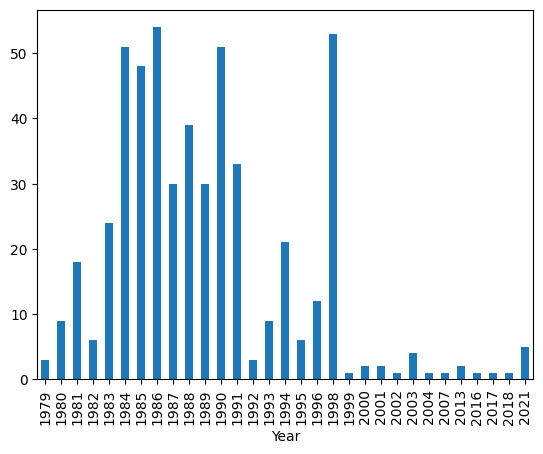

In [62]:
boards_df.groupby("Year").count()["Title"].plot(kind="bar")

<AxesSubplot: xlabel='Company'>

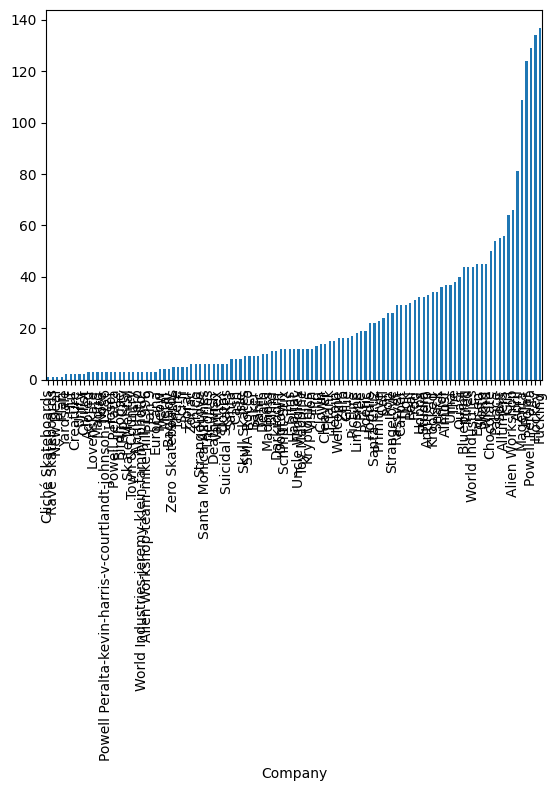

In [74]:
boards_df.groupby("Company").count().sort_values(by=["Title"])["Title"].plot(kind="bar")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


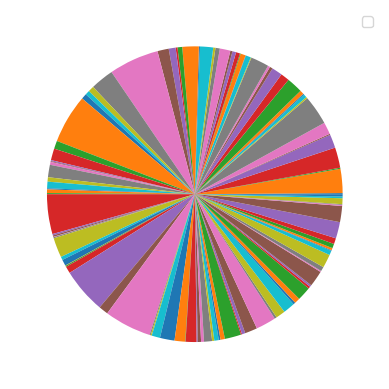

In [71]:
plt.pie(boards_df.groupby("Company").count()["Title"], normalize = True)
plt.legend() 